In [0]:
#Dataset Output Classes

# 0 ->Actinic Keratoses (Solar Keratoses) and Intraepithelial Carcinoma
# 1 ->Basal cell carcinoma
# 2 ->Benign keratosis
# 3 ->Dermatofibroma
# 4 ->Melanocytic nevi
# 5 ->Vascular skin lesions
# 6 ->Melanoma

In [2]:
from google.colab import drive
drive.mount("/content/gdrive")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
import pandas as pd

In [0]:
df = pd.read_csv("/content/gdrive/My Drive/8th Semester Project/hmnist_28_28_RGB.csv")

In [5]:
df.groupby('label').size()

label
0     327
1     514
2    1099
3     115
4    6705
5     142
6    1113
dtype: int64

In [0]:
labels = df['label']

In [0]:
df = df.drop('label',axis = 1)

In [0]:
data = df.values

In [9]:
data.shape

(10015, 2352)

In [0]:
data = data.reshape(-1,28,28,3)

In [0]:
import numpy as np

In [0]:
labels = np.array(labels)

In [13]:
labels.shape

(10015,)

In [0]:
first_time = False

In [0]:
#Handling Skew in the data

In [0]:
data = list(data)

In [17]:
data[0].shape

(28, 28, 3)

In [18]:
len(data)

10015

In [0]:
labels = list(labels)

In [0]:
if(first_time):
  from keras.preprocessing.image import ImageDataGenerator

In [0]:
if(first_time):
  datagen = ImageDataGenerator(
      featurewise_center=True,
      featurewise_std_normalization=True,
      rotation_range=20,
      width_shift_range=0.2,
      height_shift_range=0.2,
      horizontal_flip=True)

In [0]:
if(first_time):
  l = len(labels)

In [0]:
if(first_time):
  for i in range(l):
    label = labels[i]
    num =0
    if(label==0 or label ==3 or label==5):
      num =3
    elif(label==1):
      num =2
    for j in range(num):
      image = datagen.random_transform(data[i])
      data.append(image)
      labels.append(label)
    print("Done for ",i,'/',l)

In [0]:
if(first_time):
  assert len(labels) == len(data)

In [0]:
import pickle

In [0]:
if(first_time):
  pickle.dump([data,labels],open("/content/gdrive/My Drive/8th Semester Project/skin_data.pickle","wb"))

In [0]:
if(not first_time):
  data,labels = pickle.load(open("/content/gdrive/My Drive/8th Semester Project/skin_data.pickle","rb"))

In [28]:
len(data)

12795

In [29]:
len(labels)

12795

In [30]:
data_dist = {}

for i in range(7):
  data_dist[i] = 0

for i in labels:
  data_dist[i]+=1

data_dist

{0: 1308, 1: 1542, 2: 1099, 3: 460, 4: 6705, 5: 568, 6: 1113}

In [31]:
data = np.array(data)
data.shape

(12795, 28, 28, 3)

In [0]:
labels = np.array(labels)

In [33]:
labels.shape

(12795,)

In [0]:
#Visualize Data

In [0]:
import matplotlib.pyplot as plt

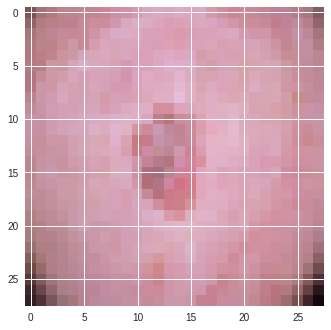

In [36]:
plt.imshow(data[8])

In [37]:
import keras

Using TensorFlow backend.


In [0]:
labels = keras.utils.to_categorical(labels, num_classes=7, dtype='float32')

In [0]:
import sklearn

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

In [0]:
#CNN Model

In [0]:
from keras.models import Sequential

In [0]:
from keras import regularizers

In [0]:
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense, Dropout, Flatten

In [0]:
batch_size = 256
num_classes = 7
number_of_epochs = 50

In [0]:
model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape=(28,28,3), padding='same',activation='relu'))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))

model.add(Flatten())

model.add(Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.1)))
model.add(Dropout(0.4))

model.add(Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.1)))
model.add(Dropout(0.3))

model.add(Dense(7, activation='softmax' ))

model.compile(loss=keras.losses.categorical_crossentropy,optimizer=keras.optimizers.Adam(lr=0.001),metrics=['accuracy'])

In [196]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_114 (Conv2D)          (None, 28, 28, 32)        896       
_________________________________________________________________
conv2d_115 (Conv2D)          (None, 28, 28, 32)        9248      
_________________________________________________________________
max_pooling2d_36 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_116 (Conv2D)          (None, 14, 14, 64)        18496     
_________________________________________________________________
conv2d_117 (Conv2D)          (None, 14, 14, 64)        36928     
_________________________________________________________________
max_pooling2d_37 (MaxPooling (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_118 (Conv2D)          (None, 7, 7, 32)          18464     
__________

In [0]:
early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss',
                              min_delta=0,
                              patience=5,
                              verbose=0, mode='auto',restore_best_weights=True)

In [198]:
model.fit(x_train, y_train,batch_size=batch_size,epochs=number_of_epochs,verbose=1,validation_data=(x_test, y_test))

Train on 10236 samples, validate on 2559 samples
Epoch 1/50
10236/10236 [==============================] - 4s 370us/step - loss: 61.0741 - acc: 0.5039 - val_loss: 24.2110 - val_acc: 0.5322
Epoch 2/50
10236/10236 [==============================] - 2s 174us/step - loss: 13.6814 - acc: 0.5721 - val_loss: 7.2669 - val_acc: 0.5869
Epoch 3/50
10236/10236 [==============================] - 2s 175us/step - loss: 4.9853 - acc: 0.5877 - val_loss: 3.3446 - val_acc: 0.6030
Epoch 4/50
10236/10236 [==============================] - 2s 175us/step - loss: 2.6374 - acc: 0.5940 - val_loss: 2.0642 - val_acc: 0.6069
Epoch 5/50
10236/10236 [==============================] - 2s 174us/step - loss: 1.8069 - acc: 0.6020 - val_loss: 1.5777 - val_acc: 0.5991
Epoch 6/50
10236/10236 [==============================] - 2s 175us/step - loss: 1.4466 - acc: 0.6044 - val_loss: 1.3982 - val_acc: 0.5889
Epoch 7/50
10236/10236 [==============================] - 2s 175us/step - loss: 1.2797 - acc: 0.6151 - val_loss: 1.1619 

In [0]:
model.save('/content/gdrive/My Drive/8th Semester Project/skin_cancer_classification__model3_0.7265_.h5')

In [0]:
#Performance Metrics

In [0]:
actual_output = []
obtained_output = []

In [0]:
#Make predictions
obtained_output = model.predict(x_test)
actual_output = y_test

In [0]:
obtained_output = [np.argmax(i) for i in obtained_output]
actual_output = [np.argmax(i) for i in y_test]

In [0]:
assert len(list(obtained_output)) == len(list(actual_output))

In [205]:
count =0
for i in obtained_output:
  if(i==4):
    count+=1
print(count/len(obtained_output))

0.5935912465806956


In [206]:
count =0
for i in actual_output:
  if(i==4):
    count+=1
print(count/len(obtained_output))

0.523642047674873


In [207]:
number_correct = 0
for i in range(len(obtained_output)):
  if(obtained_output[i]==actual_output[i]):
    number_correct +=1
print("Accurcay is : ",number_correct/len(obtained_output))

Accurcay is :  0.7264556467370067


In [0]:
from sklearn.metrics import f1_score

In [209]:
f1score = f1_score(actual_output,obtained_output,average='weighted')

print("F1 Score is : ",f1score)

F1 Score is :  0.7092627613058269


In [0]:
from sklearn.metrics import recall_score

In [211]:
recall = recall_score(actual_output,obtained_output,average='weighted')

print("Recall Score is : ",recall)

Recall Score is :  0.7264556467370067


In [0]:
from sklearn.metrics import precision_score

In [213]:
precision = precision_score(actual_output,obtained_output,average = 'weighted')

print("Precision Score is : ",precision)

Precision Score is :  0.7136241209318618


In [0]:
#LIME Explanations

In [68]:
!pip install lime

    100% |████████████████████████████████| 276kB 7.6MB/s 
  Stored in directory: /root/.cache/pip/wheels/48/13/7c/20792e4efe5fd04237c0ac92bc8551acfe36392e09953ac8ea
Successfully built lime


In [0]:
import lime
from lime import lime_image

In [0]:
def prediction_function(x):
  result = model.predict(x.reshape(-1,28,28,3))
  return result

In [0]:
explainer = lime_image.LimeImageExplainer()

In [0]:
def add_noise(image):
  row,col,ch = image.shape
  s_vs_p = 0.5
  amount = 0.005
  out = np.copy(image)
  # Salt mode
  num_salt = np.ceil(amount * image.size * s_vs_p)
  coords = [np.random.randint(0, i - 1, int(num_salt))
          for i in image.shape]
  out[coords] = 1

  # Pepper mode
  num_pepper = np.ceil(amount* image.size * (1. - s_vs_p))
  coords = [np.random.randint(0, i - 1, int(num_pepper))
          for i in image.shape]
  out[coords] = 0
  return out

In [0]:
from skimage.measure import structural_similarity as ssim
import cv2

In [0]:
def mse(imageA, imageB):
	# the 'Mean Squared Error' between the two images is the
	# sum of the squared difference between the two images;
	# NOTE: the two images must have the same dimension
	err = np.sum((imageA.astype("float") - imageB.astype("float")) ** 2)
	err /= float(imageA.shape[0] * imageA.shape[1])
	
	# return the MSE, the lower the error, the more "similar"
	# the two images are
	return err

In [0]:
def compare_images(imageA, imageB, title):
  # compute the mean squared error and structural similarity
  # index for the images
  m = mse(imageA, imageB)
  s = ssim(imageA, imageB,multichannel=True)

  # setup the figure
  fig = plt.figure(title)
  plt.suptitle("MSE: %.2f, SSIM: %.2f" % (m, s))

  # show first image
  ax = fig.add_subplot(1, 2, 1)
  plt.imshow(imageA, cmap = plt.cm.gray)
  plt.axis("off")

  # show the second image
  ax = fig.add_subplot(1, 2, 2)
  plt.imshow(imageB, cmap = plt.cm.gray)
  plt.axis("off")

  # show the images
  plt.show() 
  return m,s

In [0]:
from lime.wrappers.scikit_image import SegmentationAlgorithm

In [0]:
from skimage.color import gray2rgb, rgb2gray, label2rgb

In [0]:
segmenter = SegmentationAlgorithm('quickshift', kernel_size=1, max_dist=200, ratio=0.2)

In [0]:
def return_explanation_image(image,y,filename):
  explanation = explainer.explain_instance(image,classifier_fn = prediction_function,top_labels=7, hide_color=0, num_samples=1000, segmentation_fn=segmenter)
  output = np.argmax(y)
  
  temp, mask = explanation.get_image_and_mask(output, positive_only=True, num_features=10, hide_rest=False, min_weight = 0.01)
  fig= plt.figure()
  (ax1) = fig.add_subplot(2,1,1)
  ax1.imshow(label2rgb(mask,temp, bg_label = 0), interpolation = 'nearest')
  ax1.set_title('Positive Regions for {}'.format(output))
  
  
  fig.savefig(filename)
  img = cv2.imread(filename)
  
  return img

In [0]:
#Test Explanation 

In [226]:
explanation = explainer.explain_instance(x_test[8], 
                                         classifier_fn = prediction_function, 
                                         top_labels=7, hide_color=0, num_samples=1000, segmentation_fn=segmenter)

/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))


In [227]:
sample_test_input = x_test[8]
sample_test_input.shape

(28, 28, 3)

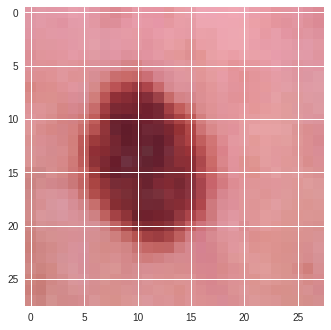

In [228]:
plt.imshow(sample_test_input)

In [229]:
output = np.argmax(y_test[8])
output

4

In [232]:
np.argmax(prediction_function(x_test[8]))

4

In [233]:
print(prediction_function(x_test[8]))

[[5.0058813e-10 6.8714400e-08 9.7773889e-05 1.0089570e-07 9.9983788e-01
  4.7813174e-08 6.4064960e-05]]


In [0]:
explainer = lime_image.LimeImageExplainer()

In [169]:
explanation = explainer.explain_instance(x_test[8], prediction_function, top_labels=5, hide_color=0, num_samples=1000)

/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))


In [0]:
from skimage.segmentation import mark_boundaries

/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))


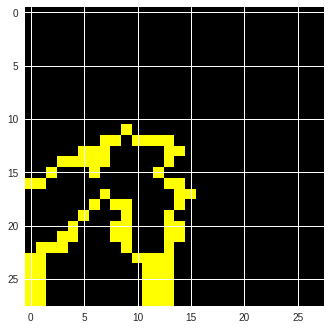

In [265]:
temp, mask = explanation.get_image_and_mask(4, positive_only=True, num_features=1, hide_rest=False)
plt.imshow(mark_boundaries(temp, mask))

/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))


Text(0.5, 1.0, 'Positive Regions for 4')

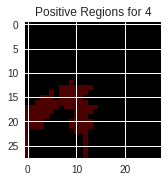

In [244]:
temp, mask = explanation.get_image_and_mask(output, positive_only=True, num_features=1, hide_rest=False, min_weight = 0.01)
fig= plt.figure()
(ax1) = fig.add_subplot(2,1,1)
ax1.imshow(label2rgb(mask,temp, bg_label = 0), interpolation = 'nearest')
ax1.set_title('Positive Regions for {}'.format(output))

In [0]:
fig.savefig("sample_input_explanation.jpeg")

In [0]:
noisy_input = add_noise(sample_test_input)

In [250]:
noisy_input.shape

(28, 28, 3)

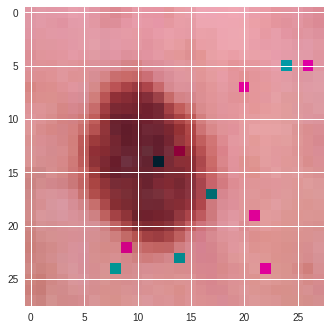

In [251]:
plt.imshow(noisy_input)

/usr/local/lib/python3.6/dist-packages/skimage/measure/_structural_similarity.py:234: skimage_deprecation: Function ``structural_similarity`` is deprecated and will be removed in version 0.14. Use ``compare_ssim`` instead.
  def structural_similarity(X, Y, win_size=None, gradient=False,


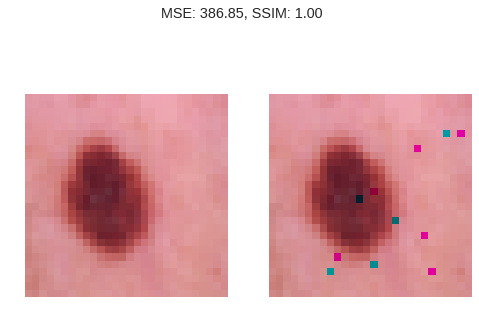

In [252]:
mse1,s1 = compare_images(sample_test_input,noisy_input,"Image Difference")

In [253]:
explanation = explainer.explain_instance(noisy_input, 
                                         classifier_fn = prediction_function, 
                                         top_labels=1, hide_color=0, num_samples=1000, segmentation_fn=segmenter)

/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))


/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))


Text(0.5, 1.0, 'Positive Regions for 4')

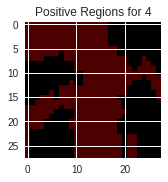

In [254]:
temp, mask = explanation.get_image_and_mask(output, positive_only=True, num_features=10, hide_rest=False, min_weight = 0.01)
fig= plt.figure()
(ax1) = fig.add_subplot(2,1,1)
ax1.imshow(label2rgb(mask,temp, bg_label = 0), interpolation = 'nearest')
ax1.set_title('Positive Regions for {}'.format(output))

In [0]:
fig.savefig("noisy_input_explanation.jpeg")

In [0]:
img = cv2.imread('noisy_input_explanation.jpeg')

In [0]:
img2 = cv2.imread('sample_input_explanation.jpeg')

In [258]:
img2.shape

(396, 576, 3)

/usr/local/lib/python3.6/dist-packages/skimage/measure/_structural_similarity.py:234: skimage_deprecation: Function ``structural_similarity`` is deprecated and will be removed in version 0.14. Use ``compare_ssim`` instead.
  def structural_similarity(X, Y, win_size=None, gradient=False,


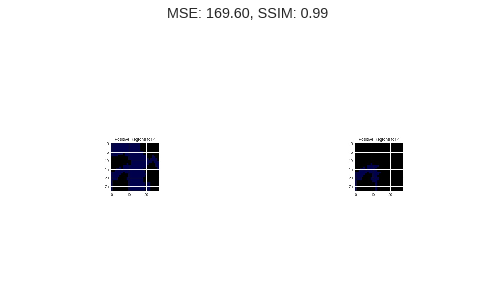

In [261]:
mse2,s2= compare_images(img,img2,"Explanation Difference")

In [0]:
#stability score for the current image
# stability = change in the explanation / change in the input
stability = mse2/mse1

In [263]:
stability

0.43840435549800766

In [0]:
number_of_samples = 200

In [123]:
img.shape

(396, 576, 3)

In [0]:
stabilities = []

In [0]:
for i in range(number_of_samples):
  image = x_test[i]
  output = y_test[i]
  
  original_filename = "/content/gdrive/My Drive/8th Semester Project/test_1.jpeg"
  original_image_explanation = return_explanation_image(image,output,original_filename)
  
  noisy_input = add_noise(image)
  
  noisy_exp_filename = "/content/gdrive/My Drive/8th Semester Project/test_2.jpeg"
  noisy_image_explanation = return_explanation_image(noisy_input,output,noisy_exp_filename)
  
  m1,s1 = compare_images(image,noisy_input,"Original Images")
  m2,s2 = compare_images(original_image_explanation,noisy_image_explanation,"Explanations")
  
  stability = m2/m1
  
  stabilities.append(stability)
  print("Done for ",i,'/',number_of_samples)

In [0]:
mean_stability = sum(stabilities)/len(stabilities)

In [223]:
print("Mean Stability of the Model is : ",mean_stability)

Mean Stability of the Model is :  0.1128044146263678
